In [17]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud

In [18]:
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

In [19]:
path = 'data/'
files = os.listdir(path)
print(files)

['bbc.csv', 'cnn.csv', 'al_jazeera.csv', 'reuters.csv']


In [20]:
data = pd.DataFrame()

for f in files:
    id = f.split('.')[0]
    temp = pd.read_csv(f'{path}{f}')
    temp['id'] = id
    data = pd.concat([data, temp])

data = data.reset_index(drop=True)

In [21]:
data

,text,likes,comments,shares,id
0,Queen Camilla was given a miniature version of...,577,228,50,bbc
1,"The study found females of five ""menopausal"" w...",174,18,52,bbc
2,The Ivy League university is named after Elihu...,116,59,44,bbc
3,"When the law passed in 2019, it sparked mass p...",133,56,16,bbc
4,"Freedom Village is located inside Korea's DMZ,...",117,18,26,bbc
...,...,...,...,...,...
3748,China's top legislators vowed to enact a slew ...,31,1,7,reuters
3749,As the US Congress struggles to pass legislati...,78,46,7,reuters
3750,President Joe Biden's State of the Union addre...,49,37,4,reuters
3751,Australia's Great Barrier Reef has been hit by...,54,4,10,reuters


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3753 entries, 0 to 3752
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      3734 non-null   object
 1   likes     3753 non-null   int64 
 2   comments  3753 non-null   int64 
 3   shares    3753 non-null   int64 
 4   id        3753 non-null   object
dtypes: int64(3), object(2)
memory usage: 146.7+ KB


In [23]:
data.describe()

,likes,comments,shares
count,3753.000000,3753.000000,3753.000000
mean,580.147882,210.482547,64.050093
std,1526.048747,328.665644,149.340794
min,3.000000,0.000000,0.000000
25%,128.000000,24.000000,12.000000
50%,293.000000,109.000000,33.000000
75%,537.000000,254.000000,62.000000
max,44198.000000,4713.000000,3758.000000


Text(0.5, 1.0, 'Count ID')

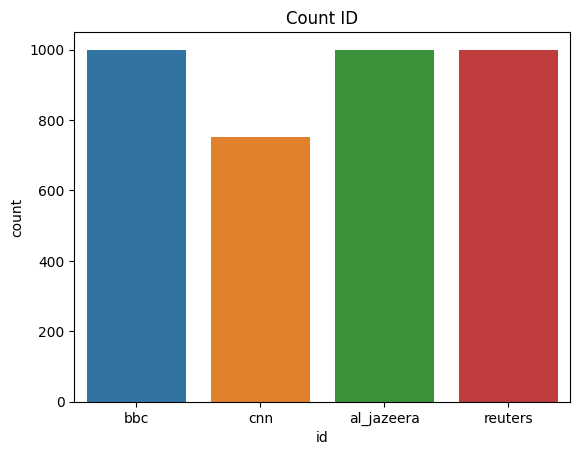

In [24]:
sns.countplot(data, x='id')
plt.title('Count ID')

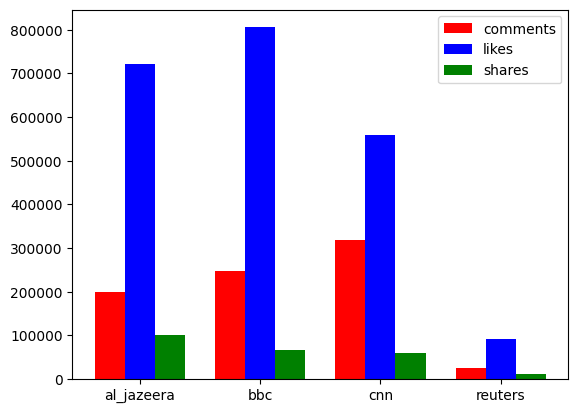

In [25]:
def return_value_with_id(df, id, labels):
    value = df.where(df['id'] == id)
    return value[labels].sum()

id = np.unique(data['id'])
ac = ['comments', 'likes', 'shares']
colors = ['red', 'blue', 'green']


for i in range(len(id)):
    plt.bar(i-0.25, return_value_with_id(data, id[i], ac[0]), color=colors[0], width=0.25)
    plt.bar(i, return_value_with_id(data, id[i], ac[1]), color=colors[1], width=0.25)
    plt.bar(i+0.25, return_value_with_id(data, id[i], ac[2]), color=colors[2], width=0.25)

plt.xticks(range(len(id)), [val for val in id])
plt.legend((ac))
plt.show()


In [26]:
def scoring(df):
    analyzer = SentimentIntensityAnalyzer()
    result = []
    for text in df['text'].values:
        text = str(text)
        compound = analyzer.polarity_scores(text)['compound']
        # Logic: https://github.com/cjhutto/vaderSentiment
        if compound >= 0.05:
            value = 'positive'
        elif -0.05 < compound < 0.05:
            value = 'neutral'
        else:
            value = 'negative'
        result.append(value)
    return result


data['compound'] = scoring(data)

data

,text,likes,comments,shares,id,compound
0,Queen Camilla was given a miniature version of...,577,228,50,bbc,neutral
1,"The study found females of five ""menopausal"" w...",174,18,52,bbc,neutral
2,The Ivy League university is named after Elihu...,116,59,44,bbc,neutral
3,"When the law passed in 2019, it sparked mass p...",133,56,16,bbc,negative
4,"Freedom Village is located inside Korea's DMZ,...",117,18,26,bbc,positive
...,...,...,...,...,...,...
3748,China's top legislators vowed to enact a slew ...,31,1,7,reuters,positive
3749,As the US Congress struggles to pass legislati...,78,46,7,reuters,negative
3750,President Joe Biden's State of the Union addre...,49,37,4,reuters,negative
3751,Australia's Great Barrier Reef has been hit by...,54,4,10,reuters,positive


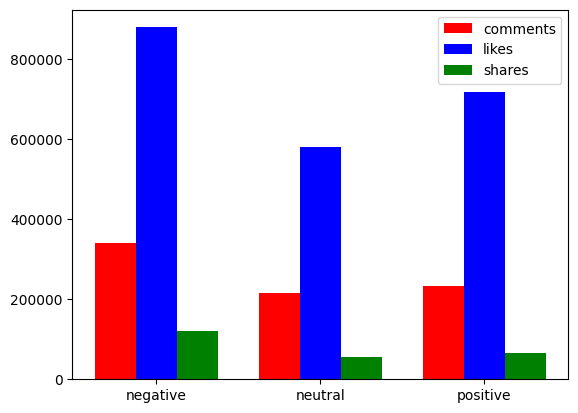

In [27]:
def return_value_with_id(df, id, labels):
    value = df.where(df['compound'] == id)
    return value[labels].sum()

c = np.unique(data['compound'])
ac = ['comments', 'likes', 'shares']
colors = ['red', 'blue', 'green']


for i in range(len(c)):
    plt.bar(i-0.25, return_value_with_id(data, c[i], ac[0]), color=colors[0], width=0.25)
    plt.bar(i, return_value_with_id(data, c[i], ac[1]), color=colors[1], width=0.25)
    plt.bar(i+0.25, return_value_with_id(data, c[i], ac[2]), color=colors[2], width=0.25)

plt.xticks(range(len(c)), [val for val in c])
plt.legend((ac))
plt.show()


<Axes: xlabel='id', ylabel='count'>

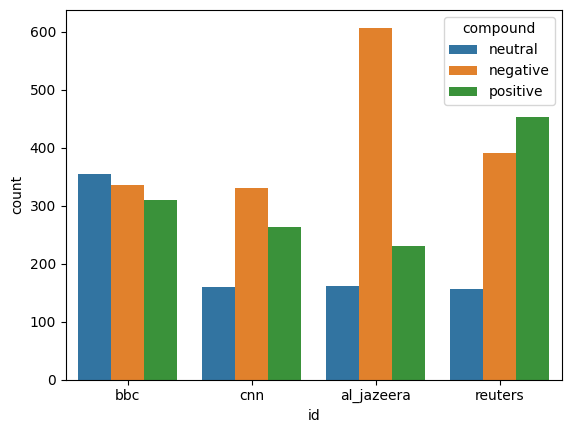

In [28]:
sns.countplot(data=data, x='id', hue='compound')

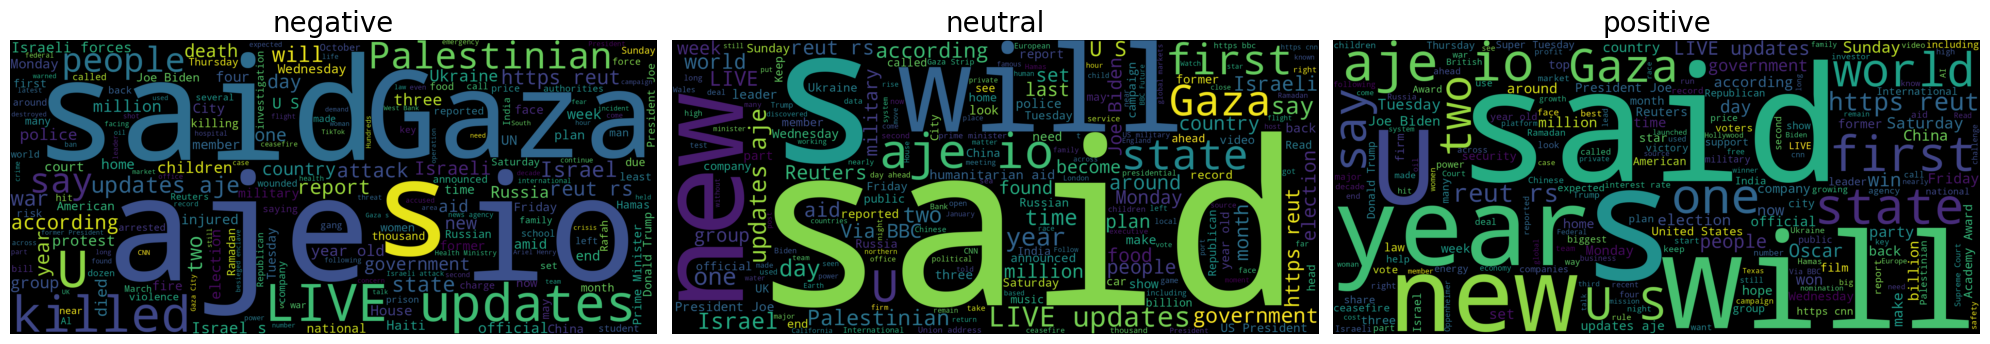

In [29]:
def wordcloud_compound(df, compound):
    text = ' '.join(df[df['compound'] == compound]['text'].dropna().astype(str))
    wordcloud = WordCloud(width=1980, height=900, random_state=2024).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(compound, fontsize=20)
    plt.axis('off')

c_values = np.unique(data['compound'])

plt.figure(figsize=(20, 10))

for i, compound_val in enumerate(c_values):
    plt.subplot(1, 3, i + 1)
    wordcloud_compound(data, compound_val)

plt.tight_layout()
plt.show()

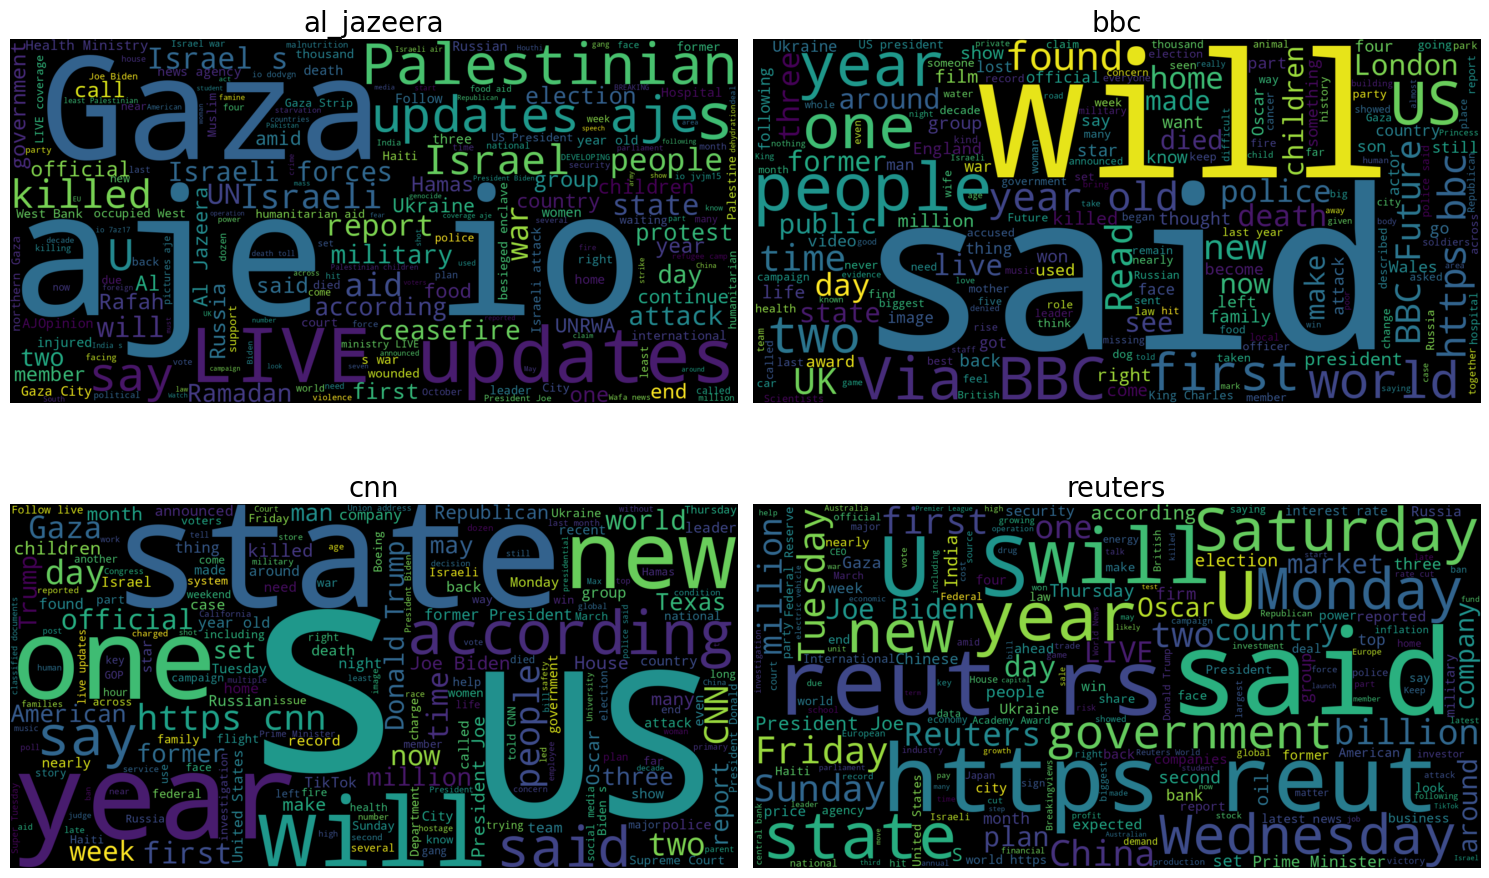

In [30]:
def wordcloud_id(df, id_val):
    text = ' '.join(df[df['id'] == id_val]['text'].dropna().astype(str))
    wordcloud = WordCloud(width=1600, height=800, random_state=2024).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(id_val, fontsize=20)
    plt.axis('off')

id_values = np.unique(data['id'])

plt.figure(figsize=(15, 10))

for i, id_val in enumerate(id_values):
    plt.subplot(2, 2, i + 1)
    wordcloud_id(data, id_val)

plt.tight_layout()
plt.show()